In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat-classification/sample_submission.csv
/kaggle/input/dog-vs-cat-classification/test/test/005463.jpg
/kaggle/input/dog-vs-cat-classification/test/test/000304.jpg
/kaggle/input/dog-vs-cat-classification/test/test/001940.jpg
/kaggle/input/dog-vs-cat-classification/test/test/007289.jpg
/kaggle/input/dog-vs-cat-classification/test/test/005491.jpg
/kaggle/input/dog-vs-cat-classification/test/test/001229.jpg
/kaggle/input/dog-vs-cat-classification/test/test/006258.jpg
/kaggle/input/dog-vs-cat-classification/test/test/007939.jpg
/kaggle/input/dog-vs-cat-classification/test/test/000875.jpg
/kaggle/input/dog-vs-cat-classification/test/test/001989.jpg
/kaggle/input/dog-vs-cat-classification/test/test/001071.jpg
/kaggle/input/dog-vs-cat-classification/test/test/000780.jpg
/kaggle/input/dog-vs-cat-classification/test/test/001506.jpg
/kaggle/input/dog-vs-cat-classification/test/test/003113.jpg
/kaggle/input/dog-vs-cat-classification/test/test/004204.jpg
/kaggle/input/dog-vs-ca

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [47]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dog-vs-cat-classification/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dog-vs-cat-classification/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128)
)


Found 25000 files belonging to 1 classes.
Found 8000 files belonging to 1 classes.


In [48]:
# normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [49]:
# cnn model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 1.0000 - loss: 1.7769e-22 - val_accuracy: 1.0000 - val_loss: 2.8371e-22
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 1.0000 - loss: 1.8797e-22 - val_accuracy: 1.0000 - val_loss: 2.8371e-22
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 1.0000 - loss: 1.9964e-22 - val_accuracy: 1.0000 - val_loss: 2.8371e-22
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 1.0000 - loss: 1.9660e-22 - val_accuracy: 1.0000 - val_loss: 2.8371e-22
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 1.0000 - loss: 2.0388e-22 - val_accuracy: 1.0000 - val_loss: 2.8371e-22


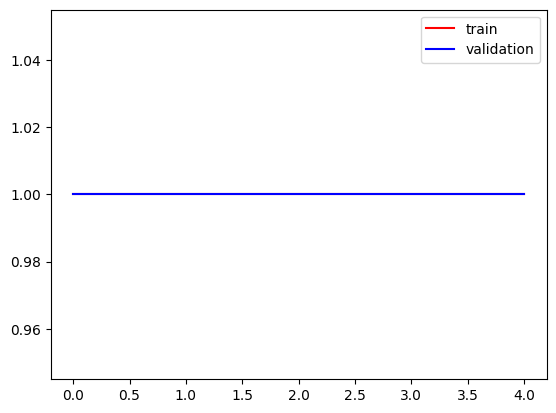

In [54]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


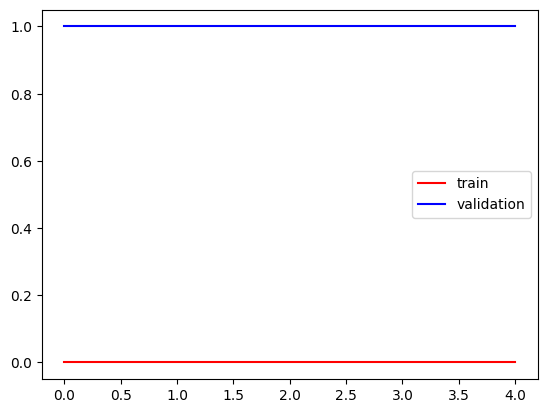

In [55]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


# way reduce 

In [63]:
from tensorflow.keras import regularizers

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))


# Flatten layer
model.add(Flatten())

# Fully connected layers with dropout
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# Output layer
# model.add(Dense(1, activation='sigmoid'))

# Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,314,113 (12.64 MB)

 Trainable params: 3,313,537 (12.64 MB)

 Non-trainable params: 576 (2.25 KB)

In [60]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [64]:
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8050 - loss: 0.0000e+00

W0000 00:00:1715142610.732785     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8052 - loss: 0.0000e+00 - val_accuracy: 0.9999 - val_loss: 0.0000e+00
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9999 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


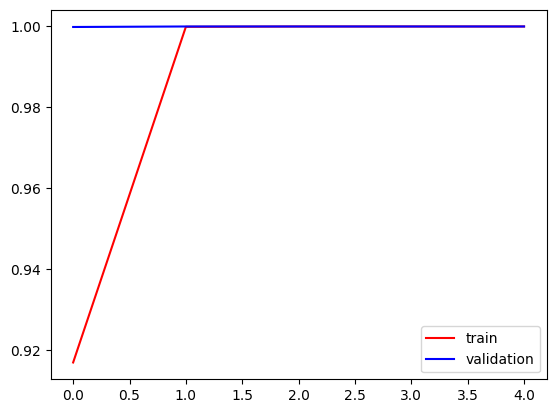

In [65]:
# Plotting training and validation loss
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


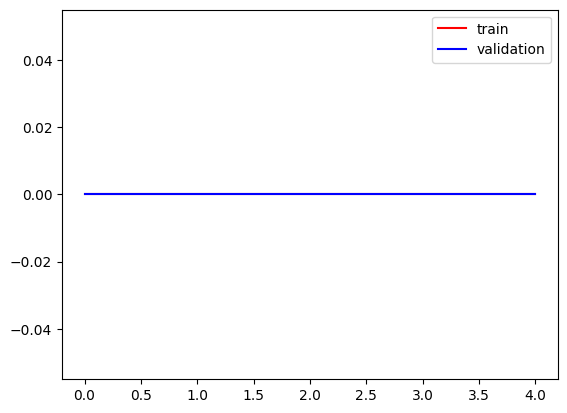

In [66]:
# Plotting training and validation loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


In [69]:
from tensorflow.keras.optimizers import RMSprop

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# Fully connected layers with dropout
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_ds, epochs=5, validation_data=validation_ds, callbacks=[early_stopping])


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,314,113 (12.64 MB)

 Trainable params: 3,313,537 (12.64 MB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8327 - loss: 0.6253

W0000 00:00:1715143378.661849     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.8329 - loss: 0.6249 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 1.8496e-04
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 1.0000 - loss: 9.4054e-04 - val_accuracy: 1.0000 - val_loss: 1.4801e-06
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 1.0000 - loss: 3.1058e-06 - val_accuracy: 1.0000 - val_loss: 3.8892e-07
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 1.0000 - loss: 2.5738e-06 - val_accuracy: 1.0000 - val_loss: 3.2785e-07


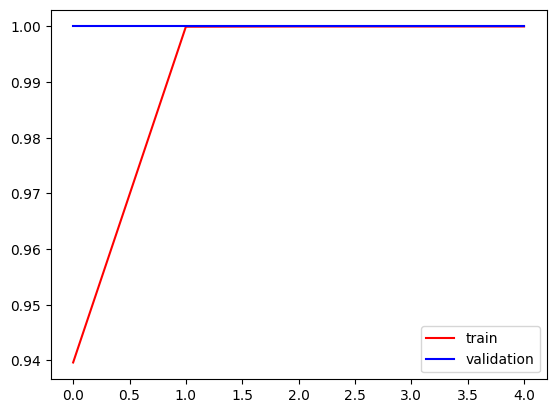

In [70]:
# Plotting training and validation loss
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()